# Mining Software Repositories: OpenStack Nova Project.

### Goal

The goal of this tool and analysis is to help in capturing insights from the commits on a project repo, in this case: the openstack nova project repo. This will help in understanding the project as well as provide guidiance to contributors and maintainers.

### Objectives

The following questions will be answered:
* Find the most actively modified module?
* How many commits occured during the studied period?
* How much churn occurred during the studied period? Churn is defined as the sum of added and removed lines by all commits.

**NB**: This workflow is responsible for the pre-processing, analysis, and generation of insight from the collected data. It is assumed that the automated collection of the data via the script accessible in thesame folder with this notebook has been completed. The collected data will be loaded here before the other process in the workflow executes.

### Required imports:

In [1]:
# Built-in libraries
import json
import os

# The normal data science ecosystem libraries
# pandas for data wrangling
import pandas as pd

# Plotting modules and libraries required
import matplotlib as mpl
import matplotlib.pyplot as plt

### Required settings:

In [2]:
# Settings:
# 1. Command needed to make plots appear in the Jupyter Notebook
%matplotlib inline

# 2. Command needed to make plots bigger in the Jupyter Notebook
plt.rcParams['figure.figsize']= (12, 10)

# 3. Command needed to make 'ggplot' styled plots- professional and yet good looking theme.
plt.style.use('ggplot')

# 4. This will make the plot zoomable
# mpld3.enable_notebook()

### Other utility functions for data manipulation

In [3]:
# Utility data manipulation functions

# 1. Extract path parameters from filename
def get_path_parameters(dframe):
     filename = os.path.basename(dframe["filename"])
     filetype = os.path.splitext(dframe["filename"])[1]
     directory = os.path.dirname(dframe["filename"])
     
     return directory, filename, filetype

### 1. Loading the data

In [4]:
# Open and load json file
with open('data.json', encoding="utf8") as file:
    data = json.load(file)
    print("data loaded successfully")

data loaded successfully


### Data normalization

The collected commit data is a semi-structured json which has nested data similar to the image below. Files is a list of file objects. The loaded data will be normalized into a flat table using pandas.json_normalize.


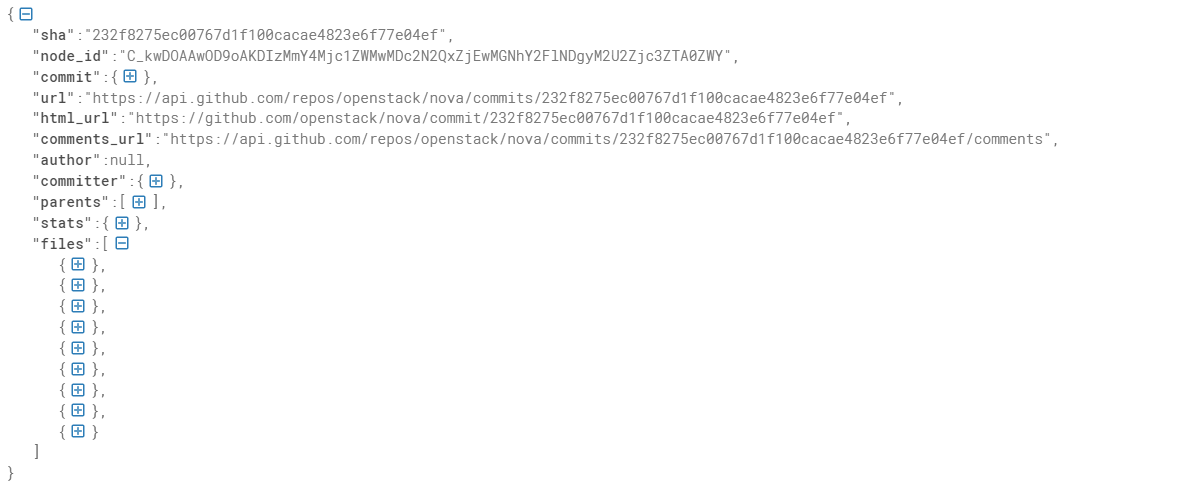

In [5]:
df = pd.json_normalize(data, "files", ["commit_node_id", "commit_sha", "commit_html_url", "commit_date" ])

### 2. Displaying current state of the data

In [6]:
# The first 3 rows
df.head(3)

,sha,filename,status,additions,deletions,changes,blob_url,raw_url,contents_url,patch,previous_filename,commit_node_id,commit_sha,commit_html_url,commit_date
0,0438913de34e2751410da7a035e21b7e73325760,nova/exception.py,modified,4,0,4,https://github.com/openstack/nova/blob/0c31561...,https://github.com/openstack/nova/raw/0c315617...,https://api.github.com/repos/openstack/nova/co...,"@@ -1923,6 +1923,10 @@ class SecureBootNotSupp...",NaN,C_kwDOAAwOD9oAKDBjMzE1NjE3OTJlMGUxM2E5ZjgyNjdl...,0c31561792e0e13a9f8267e71fa484ab79957f04,https://github.com/openstack/nova/commit/0c315...,2022-02-17T21:43:32Z
1,ae824e635cb508ecc9f97d0c4d23342267c0787a,nova/tests/unit/virt/libvirt/test_driver.py,modified,38,0,38,https://github.com/openstack/nova/blob/0c31561...,https://github.com/openstack/nova/raw/0c315617...,https://api.github.com/repos/openstack/nova/co...,"@@ -5082,6 +5082,44 @@ def test_get_guest_conf...",NaN,C_kwDOAAwOD9oAKDBjMzE1NjE3OTJlMGUxM2E5ZjgyNjdl...,0c31561792e0e13a9f8267e71fa484ab79957f04,https://github.com/openstack/nova/commit/0c315...,2022-02-17T21:43:32Z
2,d71d13ab3721422c013cff586e7c31326ae50e1c,nova/tests/unit/virt/libvirt/test_host.py,modified,8,0,8,https://github.com/openstack/nova/blob/0c31561...,https://github.com/openstack/nova/raw/0c315617...,https://api.github.com/repos/openstack/nova/co...,"@@ -1900,6 +1900,14 @@ def fake_get_mtype(arch...",NaN,C_kwDOAAwOD9oAKDBjMzE1NjE3OTJlMGUxM2E5ZjgyNjdl...,0c31561792e0e13a9f8267e71fa484ab79957f04,https://github.com/openstack/nova/commit/0c315...,2022-02-17T21:43:32Z


In [7]:
# The last 3 rows
df.tail(3)

,sha,filename,status,additions,deletions,changes,blob_url,raw_url,contents_url,patch,previous_filename,commit_node_id,commit_sha,commit_html_url,commit_date
1970,5573c098a83d048ddc90b2f20a22fbde0b30430f,nova/db/main/legacy_migrations/versions/402_tr...,modified,68,59,127,https://github.com/openstack/nova/blob/b390e82...,https://github.com/openstack/nova/raw/b390e829...,https://api.github.com/repos/openstack/nova/co...,"@@ -79,10 +79,10 @@ def _create_shadow_tables(...",NaN,MDY6Q29tbWl0NzkwMDMxOmIzOTBlODI5ZjA0ZjQwOWNmYz...,b390e829f04f409cfc3d92c8d4e4653f17c7beb1,https://github.com/openstack/nova/commit/b390e...,2021-08-18T14:07:25Z
1971,48adcb07d6af188ced7acb6d7ddcbfbe8fec0489,nova/tests/unit/virt/vmwareapi/fake.py,modified,4,2,6,https://github.com/openstack/nova/blob/3f548f3...,https://github.com/openstack/nova/raw/3f548f31...,https://api.github.com/repos/openstack/nova/co...,"@@ -759,7 +759,8 @@ def __init__(self, name=""h...",NaN,MDY6Q29tbWl0NzkwMDMxOjNmNTQ4ZjMxMzY3M2U3YjBiMD...,3f548f313673e7b0b08e8a4f9d5f149a056ab341,https://github.com/openstack/nova/commit/3f548...,2021-08-05T08:13:02Z
1972,0d8639f9ae83bb81df262d98d58a7ebd2109de41,nova/tests/unit/virt/vmwareapi/test_driver_api.py,modified,1,1,2,https://github.com/openstack/nova/blob/3f548f3...,https://github.com/openstack/nova/raw/3f548f31...,https://api.github.com/repos/openstack/nova/co...,"@@ -2138,7 +2138,7 @@ def test_get_available_r...",NaN,MDY6Q29tbWl0NzkwMDMxOjNmNTQ4ZjMxMzY3M2U3YjBiMD...,3f548f313673e7b0b08e8a4f9d5f149a056ab341,https://github.com/openstack/nova/commit/3f548...,2021-08-05T08:13:02Z


In [8]:
# Summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sha                1973 non-null   object
 1   filename           1973 non-null   object
 2   status             1973 non-null   object
 3   additions          1973 non-null   int64 
 4   deletions          1973 non-null   int64 
 5   changes            1973 non-null   int64 
 6   blob_url           1973 non-null   object
 7   raw_url            1973 non-null   object
 8   contents_url       1973 non-null   object
 9   patch              1965 non-null   object
 10  previous_filename  8 non-null      object
 11  commit_node_id     1973 non-null   object
 12  commit_sha         1973 non-null   object
 13  commit_html_url    1973 non-null   object
 14  commit_date        1973 non-null   object
dtypes: int64(3), object(12)
memory usage: 231.3+ KB


### 3 Verify data

In [9]:
# Let us manually examine atleast one commit and see if the present rows are correct.
# We use the most recent commit as at the development time.
# Pls note that this commit will not be part of commits after 6 month from today February 17th, 2022
commit = '3a14c1a4277a9f44b67e080138b28b680e5e6824'
df[df["commit_sha"] == commit]

,sha,filename,status,additions,deletions,changes,blob_url,raw_url,contents_url,patch,previous_filename,commit_node_id,commit_sha,commit_html_url,commit_date
36,08006e2b92a44b709b3ef6171cfb9a95519c8f5e,nova/compute/api.py,modified,18,4,22,https://github.com/openstack/nova/blob/3a14c1a...,https://github.com/openstack/nova/raw/3a14c1a4...,https://api.github.com/repos/openstack/nova/co...,"@@ -4822,10 +4822,24 @@ def _attach_volume(sel...",NaN,C_kwDOAAwOD9oAKDNhMTRjMWE0Mjc3YTlmNDRiNjdlMDgw...,3a14c1a4277a9f44b67e080138b28b680e5e6824,https://github.com/openstack/nova/commit/3a14c...,2022-02-14T12:37:58Z
37,79a62da21a6d4e768b48f8be3c44e39b9bcd3a83,nova/tests/unit/compute/test_api.py,modified,30,0,30,https://github.com/openstack/nova/blob/3a14c1a...,https://github.com/openstack/nova/raw/3a14c1a4...,https://api.github.com/repos/openstack/nova/co...,"@@ -524,6 +524,36 @@ def test_tagged_volume_at...",NaN,C_kwDOAAwOD9oAKDNhMTRjMWE0Mjc3YTlmNDRiNjdlMDgw...,3a14c1a4277a9f44b67e080138b28b680e5e6824,https://github.com/openstack/nova/commit/3a14c...,2022-02-14T12:37:58Z
38,ef5582543a2ac953179e5dbc3e493e69c9bc84bf,releasenotes/notes/bug-1960401-504eb255253d966...,added,8,0,8,https://github.com/openstack/nova/blob/3a14c1a...,https://github.com/openstack/nova/raw/3a14c1a4...,https://api.github.com/repos/openstack/nova/co...,"@@ -0,0 +1,8 @@\n+---\n+fixes:\n+ - |\n+ T...",NaN,C_kwDOAAwOD9oAKDNhMTRjMWE0Mjc3YTlmNDRiNjdlMDgw...,3a14c1a4277a9f44b67e080138b28b680e5e6824,https://github.com/openstack/nova/commit/3a14c...,2022-02-14T12:37:58Z


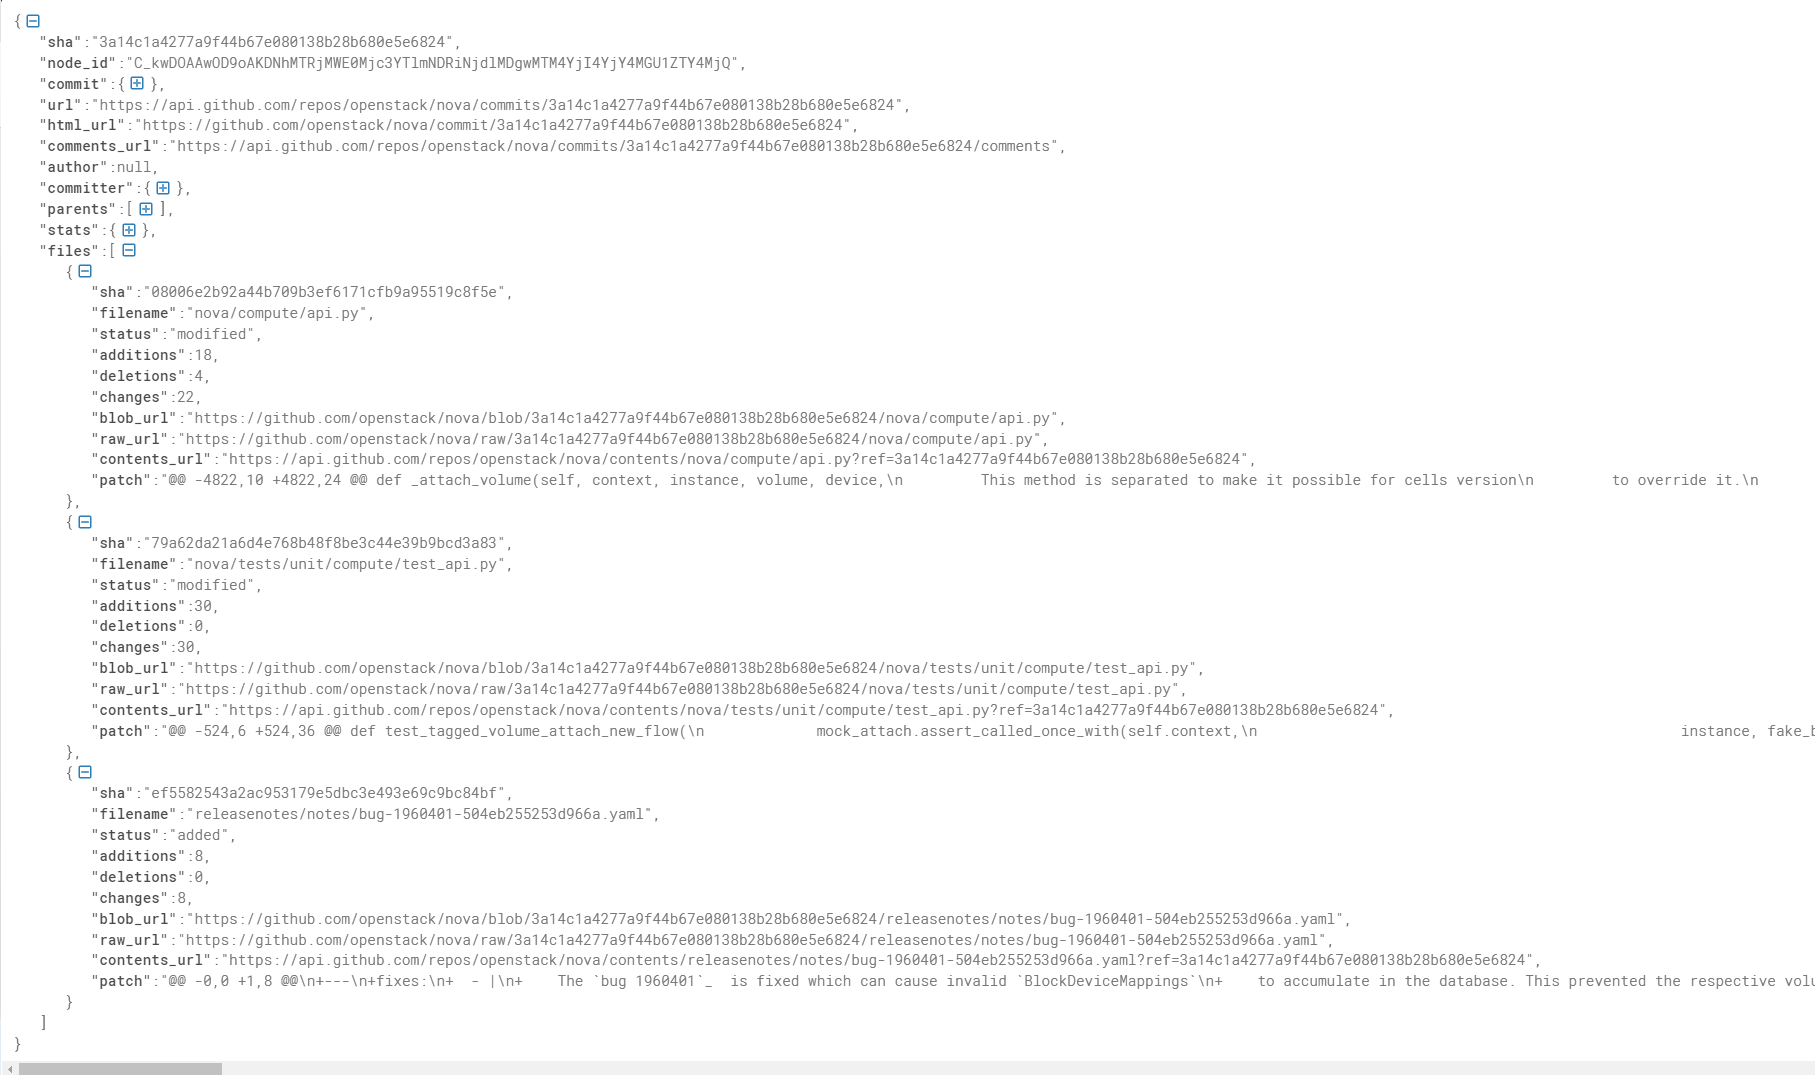

### 4. Data cleaning

In [10]:
# Removing columns not needed for the analysis
columns = ['previous_filename', 'patch', 'contents_url', 'raw_url', 'commit_node_id']
df.drop(columns, inplace=True, axis=1)

In [11]:
# Generating and adding extra columns
df[["directory", "file_name", "file_type"]] = df.apply(lambda x: get_path_parameters(x), axis=1, result_type="expand")

In [12]:
# Delete the previous filename column as it is no longer required
df.drop("filename", inplace=True, axis=1)

In [13]:
# Rename columns
df.rename(columns={"sha": "file_sha", "status": "file_status", "additions":"no_of_additions", "deletions": "no_of_deletions"}, inplace=True)

In [14]:
# Optimising the data frame by correcting the data types. 
# This will also make more operations possible on the data frame

df = df.astype({'file_sha': 'str', 'file_status': 'category', 'no_of_additions':'int', 'no_of_deletions':'int', 'changes':'int', 'blob_url':'str', 'commit_sha':'str', 'commit_html_url':'str', 'directory':'str', 'file_name':'str', 'file_type':'category'})
df['commit_date'] = pd.to_datetime(df['commit_date'], infer_datetime_format=True)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   file_sha         1973 non-null   object             
 1   file_status      1973 non-null   category           
 2   no_of_additions  1973 non-null   int32              
 3   no_of_deletions  1973 non-null   int32              
 4   changes          1973 non-null   int32              
 5   blob_url         1973 non-null   object             
 6   commit_sha       1973 non-null   object             
 7   commit_html_url  1973 non-null   object             
 8   commit_date      1973 non-null   datetime64[ns, UTC]
 9   directory        1973 non-null   object             
 10  file_name        1973 non-null   object             
 11  file_type        1973 non-null   category           
dtypes: category(2), datetime64[ns, UTC](1), int32(3), object(6)
memory usage: 13

### A. Basic Analysis and Visualization

#### 1. Total number of commits that occured during the studied period.

In [16]:
# value_counts returns a series object counting all unique values. 
# the 1st value being the most frequently occuring i.e. the commit with highest no of file changes.
df["commit_sha"].value_counts()

f3d48000b139ec38d92da276a43a8387f76cbc89    83
0e0196d979cf1b8e63b9656358116a36f1f09ede    83
ccef1940bf92da7441beb6b88fa9f998b1e9b2b2    36
d2a5fe5621d6ff1ae8ba5087049e0c4347592cf6    21
ac21c6674c8444edc5afd25b7d63936182fe3580    21
                                            ..
e2b1581d8c4f03cecca770aabb8e6123a7bef93a     1
f318f822fcf6dec4c3cd9b7e5111f3e1371aa51a     1
61b169d40f7df3c9ea782b3cf2ac96d3fbdceef2     1
f024490e95c2bdb8072247e9907c6aa1475c80d8     1
e28afc564700a1a35e3bf0269687d5734251b88a     1
Name: commit_sha, Length: 467, dtype: int64

In [17]:
print("The total no. of processed commits is: {commits_total}".format(commits_total = len(df["commit_sha"].value_counts())))

The total no. of processed commits is: 467


#### 2. The 12 most modified files 

In [18]:
df["file_name"].value_counts().head(12)

driver.py                           77
api.py                              53
test_driver.py                      48
test_api.py                         44
neutron.py                          44
nova.py                             42
manager.py                          38
test_servers_resource_request.py    37
test_migrations.py                  36
test_neutron.py                     36
servers.py                          31
test_compute.py                     30
Name: file_name, dtype: int64

Text(0, 0.5, 'File Names')

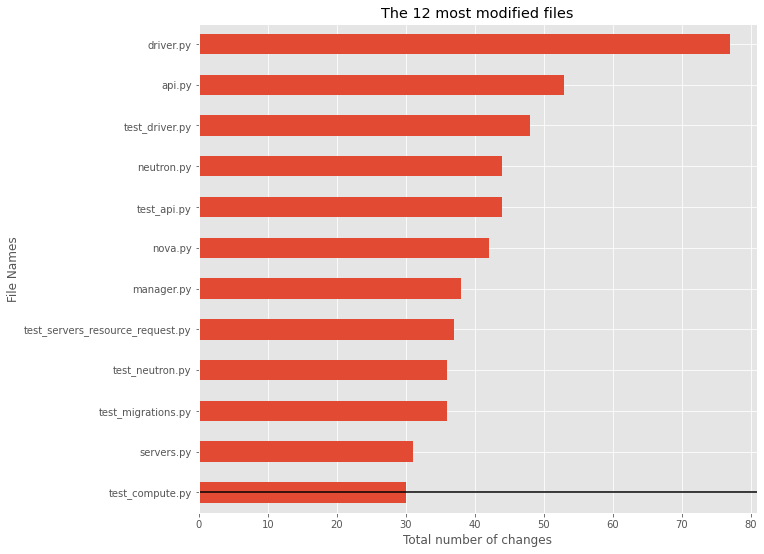

In [19]:
df["file_name"].value_counts().head(12).sort_values().plot.barh(figsize=(10, 9)); plt.axhline(0, color='k'); plt.title('The 12 most modified files'); plt.xlabel('Total number of changes'); plt.ylabel('File Names')

#### 3. The 12 most modified directories

In [20]:
# the term directory is used in place of module
df["directory"].value_counts().head(12)

nova/tests/unit/compute              101
nova/tests/functional                 91
nova/compute                          79
nova/api/openstack/compute            79
                                      77
nova/tests/fixtures                   75
releasenotes/notes                    74
nova/virt/libvirt                     73
doc/source/admin                      61
nova/tests/unit/virt/libvirt          61
nova/tests/functional/regressions     59
nova/network                          52
Name: directory, dtype: int64

Text(0.5, 1.0, 'The 12 most modified modules')

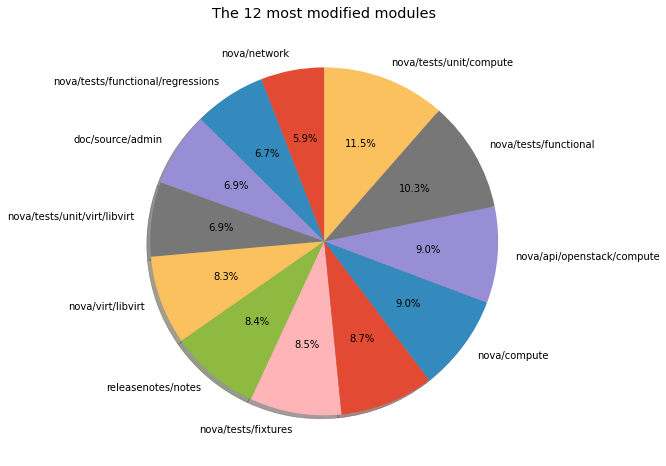

In [21]:
df["directory"].value_counts().head(12).sort_values().plot.pie(autopct='%1.1f%%', figsize=(20,8),
        shadow=True, startangle=90, ylabel="");plt.title('The 12 most modified modules')

#### 4. The most modified file types

In [22]:
df["file_type"].value_counts()

.py      1557
.rst      167
.yaml     114
.json      31
.txt       31
.tpl       21
.ini       18
           10
.inc        8
.cfg        6
.mako       4
.sh         4
.conf       2
Name: file_type, dtype: int64

Text(0, 0.5, 'Total number of files')

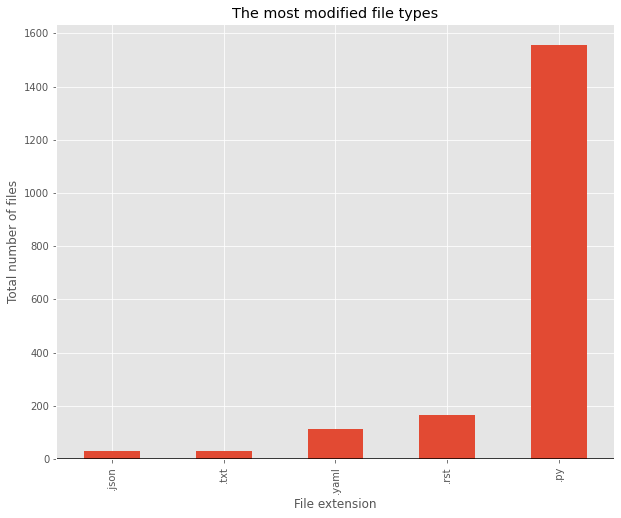

In [23]:
df["file_type"].value_counts().head().sort_values().plot.bar(figsize=(10, 8)); plt.axhline(0, color='k'); plt.title('The most modified file types'); plt.xlabel('File extension'); plt.ylabel('Total number of files')

#### 5. Churn

In [24]:
# sum of all changes across all directories that occured during the period
df["changes"].sum()

90284

###  B. Exploring activities at module level using aggregation operations 

#### 1. The total number of file modifications by directory i.e. no. of rows per directory. A row in df records a file change & the commit responsible

In [25]:
# the term directory is used in place of module
# thesame files may be modified in a particular directory by different commits
# we cant have rows where a particular commit modifies thesame file more than once
# Reveal the total no of changes in each directiory i.e. the no. of times the directory was modified.
grp1 = df.groupby(['directory']).size().sort_values(ascending=False).head(12)
grp1

directory
nova/tests/unit/compute              101
nova/tests/functional                 91
nova/api/openstack/compute            79
nova/compute                          79
                                      77
nova/tests/fixtures                   75
releasenotes/notes                    74
nova/virt/libvirt                     73
nova/tests/unit/virt/libvirt          61
doc/source/admin                      61
nova/tests/functional/regressions     59
nova/network                          52
dtype: int64

#### 2. The total number of commits per directory

In [26]:
# split data by column <directory>
# pass column <commit_sha> to indicate we want the number of unique values for that column
# apply .nunique() to count the number of unique values in that coulmn
grp2 = df.groupby('directory')['commit_sha'].nunique().sort_values(ascending=False).head(12)
grp2

directory
nova/tests/functional           75
releasenotes/notes              74
nova/tests/unit/compute         68
nova/compute                    65
nova/tests/fixtures             64
nova/virt/libvirt               52
                                52
nova/tests/unit/virt/libvirt    49
nova                            42
nova/network                    41
doc/source/admin                40
nova/tests/unit/network         38
Name: commit_sha, dtype: int64

Text(0, 0.5, 'Directories')

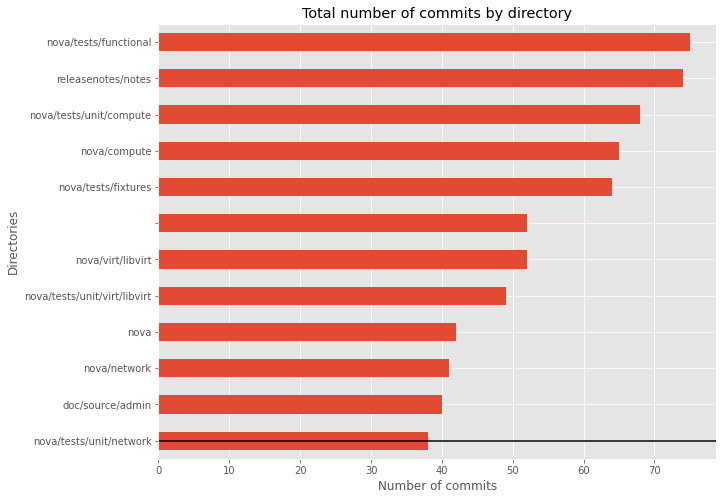

In [27]:
grp2.sort_values().plot.barh(figsize=(10, 8)); plt.axhline(0, color='k'); plt.title('Total number of commits by directory'); plt.xlabel('Number of commits'); plt.ylabel('Directories')

#### 3. The number of files by directory

In [28]:
# The number of unique file per directory
group_by = df.groupby('directory')['file_name'].nunique().sort_values(ascending=False).head(12)
group_by

directory
releasenotes/notes                       41
nova/tests/functional/regressions        21
nova/api/openstack/compute               17
nova/tests/unit/api/openstack/compute    13
nova/tests/unit                          13
doc/source/admin                         13
nova/objects                             13
nova/tests/unit/compute                  12
nova/tests/fixtures                      10
nova/tests/unit/objects                  10
nova/tests/functional                    10
doc/source/reference                      9
Name: file_name, dtype: int64

#### 4. The churn by directory

In [29]:
df.groupby('directory').sum().sort_values(by='changes', ascending=False).head(12)

,no_of_additions,no_of_deletions,changes
directory,,,
nova/tests/functional,9333,6467,15800
doc/source/admin,6640,712,7352
nova/tests/unit/scheduler,3458,3514,6972
doc/source/user,32,3909,3941
nova/tests/unit/network,3000,488,3488
nova/scheduler,1595,1648,3243
nova/tests/fixtures,1729,729,2458
nova/tests/unit/compute,1673,778,2451
nova/tests/unit/api/openstack/compute,1480,944,2424


#### 5. The churn by file name

In [30]:
df.groupby('file_name').sum().sort_values(by='changes', ascending=False).head(12)

,no_of_additions,no_of_deletions,changes
file_name,,,
test_servers_resource_request.py,7260,1052,8312
test_servers.py,1550,5781,7331
cells.rst,2264,1678,3942
test_driver.py,1029,2704,3733
test_neutron.py,2934,430,3364
scheduling.rst,2886,30,2916
test_manager.py,2285,87,2372
driver.py,1018,1266,2284
models.py,327,1930,2257


#### 6. The churn by file type

In [31]:
df.groupby('file_type').sum().sort_values(by='changes', ascending=False).head(12)

,no_of_additions,no_of_deletions,changes
file_type,,,
.py,45489,26069,71558
.rst,8005,7290,15295
.yaml,1215,131,1346
.json,562,20,582
.tpl,547,0,547
.ini,293,20,313
,38,140,178
.inc,95,39,134
.sh,62,63,125


### Findings

The following findings are as at the date of this analysis (18th February 2022). 

The analysis reveals that the project is still actively maintained and development is primarily in Python. One key aspect of this project regularly improved is the compute resource and its associated APIs and it is important to note that with each update a high level of testing is carried out especially functional which can be seen from the number of commits and total churn for those directories. Also, while python code file has the highest number of modifications and is expected, significant levels of modification occur on restructuredText files indicating efforts towards technical documentation.